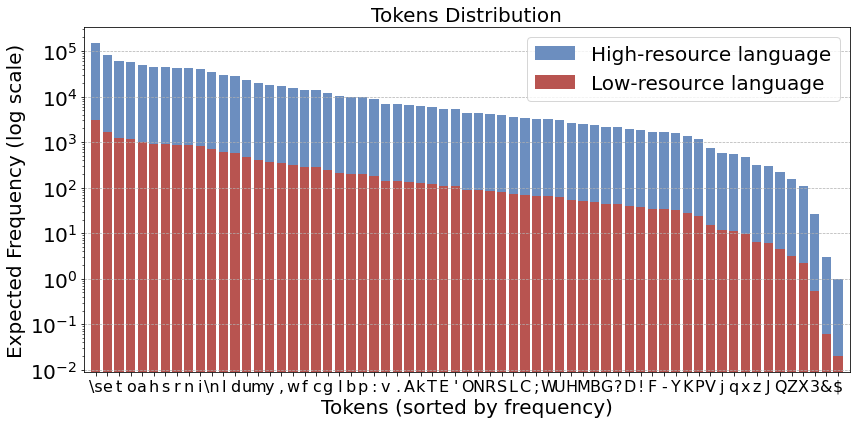

In [16]:
# first draw tokens distribution:

import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pickle

def update_x(x):
    if x == ' ':
        return '\\s'
    elif x == '\n':
        return '\\n'
    return x


meta_path = 'nanoGPT/data/shakespeare_char/meta.pkl'
load_meta = os.path.exists(meta_path)
with open(meta_path, 'rb') as f:
    meta = pickle.load(f)
    # TODO want to make this more general to arbitrary encoder/decoder schemes
stoi, itos = meta['stoi'], meta['itos']
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

data_dir = 'nanoGPT/data/shakespeare_char'
data = np.memmap(os.path.join(data_dir, 'train.bin'), dtype=np.uint16, mode='r')

counter = Counter(data)
counts = np.array(sorted(counter.values(), reverse=True))

decoded_tokens = list(counter.items())
decoded_tokens = sorted(decoded_tokens, key=lambda x: x[1], reverse=True)
decoded_tokens = [int(x[0]) for x in decoded_tokens]
decoded_tokens = list(decode(decoded_tokens))

decoded_tokens = [update_x(x) for x in decoded_tokens]

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the bars with labels for "high-resource language" and "low-resource language"
plt.bar(range(len(counts)), counts*0.98, color="#6C8EBF", label="High-resource language")
plt.bar(range(len(counts)), counts*0.02, color="#B85450", label="Low-resource language")

# Remove x-ticks and their labels
plt.xticks(ticks=range(len(decoded_tokens)), labels=decoded_tokens, fontsize=16)

# Set y-scale to log
plt.yscale('log')

# Adjust y-ticks font size
plt.yticks(fontsize=20)

# Add title and labels
plt.title('Tokens Distribution', fontsize=20)  # Adjust font size
plt.xlabel('Tokens (sorted by frequency)', fontsize=20)  # Add x-axis label with font size
plt.ylabel('Expected Frequency (log scale)', fontsize=20)  # Add y-axis label with font size

# Add a legend for the labels
plt.legend(fontsize=20)

plt.grid(True, which='major', linestyle='--', linewidth=0.7, axis='y')
plt.xlim((-1, 65))

plt.tight_layout()
# Save the plot as a PDF file
plt.savefig("assets/token_distribution.pdf", format="pdf")

# Display the plot
plt.show()
